In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
df_train = pd.read_csv('trainset.csv')
df_test = pd.read_csv('testset.csv')
train_prices = df_train['Close'].values.reshape(-1, 1)
test_prices = df_test['Close'].values.reshape(-1, 1)
scaler=MinMaxScaler()
scaled_train = scaler.fit_transform(train_prices)
scaled_test = scaler.transform(test_prices)

In [ ]:
def create_sequences (data, seq_length):
  x = []
  y = []
  for i in range(len(data)-seq_length):
    x.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences (scaled_train, seq_length)
x_test, y_test = create_sequences (scaled_test, seq_length)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1199, 60, 1), (1199, 1), (65, 60, 1), (65, 1))

In [ ]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor (y_test, dtype=torch.float32)

In [ ]:
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader (train_dataset, batch_size=64, shuffle=True)

In [ ]:
class RNNModel (nn.Module):
  def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
    super (RNNModel, self). __init__()
    self.rnn = nn. RNN(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn. Linear(hidden_size, output_size)
  def forward(self, x):
    out,_=self.rnn(x)
    out=self.fc (out[:,-1,:])
    return out

In [ ]:
model=RNNModel()
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)

In [ ]:
!pip install torchinfo

In [ ]:
print("Name: HAREVASU S")
print("Register Number: 212223230069")
from torchinfo import summary
summary(model,input_size=(64,60,1))

Name: HAREVASU S
Register Number: 212223230069


Layer (type:depth-idx)                   Output Shape              Param #
RNNModel                                 [64, 1]                   --
├─RNN: 1-1                               [64, 60, 64]              12,608
├─Linear: 1-2                            [64, 1]                   65
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 48.42
Input size (MB): 0.02
Forward/backward pass size (MB): 1.97
Params size (MB): 0.05
Estimated Total Size (MB): 2.03

In [ ]:
criterion = nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

Epoch [1/20], Loss: 0.0003
Epoch [2/20], Loss: 0.0003
Epoch [3/20], Loss: 0.0003
Epoch [4/20], Loss: 0.0003
Epoch [5/20], Loss: 0.0003
Epoch [6/20], Loss: 0.0003
Epoch [7/20], Loss: 0.0003
Epoch [8/20], Loss: 0.0003
Epoch [9/20], Loss: 0.0003
Epoch [10/20], Loss: 0.0003
Epoch [11/20], Loss: 0.0003
Epoch [12/20], Loss: 0.0003
Epoch [13/20], Loss: 0.0003
Epoch [14/20], Loss: 0.0003
Epoch [15/20], Loss: 0.0003
Epoch [16/20], Loss: 0.0003
Epoch [17/20], Loss: 0.0003
Epoch [18/20], Loss: 0.0003
Epoch [19/20], Loss: 0.0003
Epoch [20/20], Loss: 0.0002
Name: HAREVASU S
Register Number: 212223230069


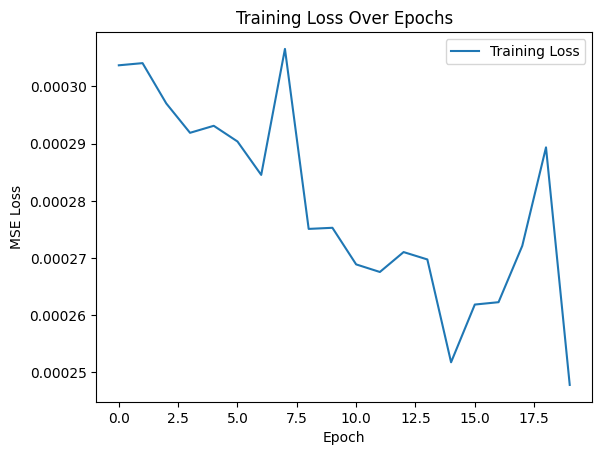

In [ ]:
def train_model(model, train_loader, criterion, optimizer, epochs=20):
  train_losses = []
  model.train()

  for epoch in range(epochs):
    total_loss = 0
    for x_batch, y_batch in train_loader:
      x_batch,y_batch=x_batch.to(device),y_batch.to(device)
      optimizer.zero_grad()
      outputs=model(x_batch)
      loss=criterion(outputs, y_batch)
      loss.backward()
      optimizer.step()
      total_loss += loss.item()
    train_losses.append(total_loss/len(train_loader))
    print (f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/ len(train_loader):.4f}')
  print("Name: HAREVASU S")
  print("Register Number: 212223230069")
  plt.plot(train_losses, label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE Loss')
  plt.title('Training Loss Over Epochs')
  plt.legend()
  plt.show()

train_model (model, train_loader, criterion, optimizer)

Name: HAREVASU S
Register Number: 212223230069


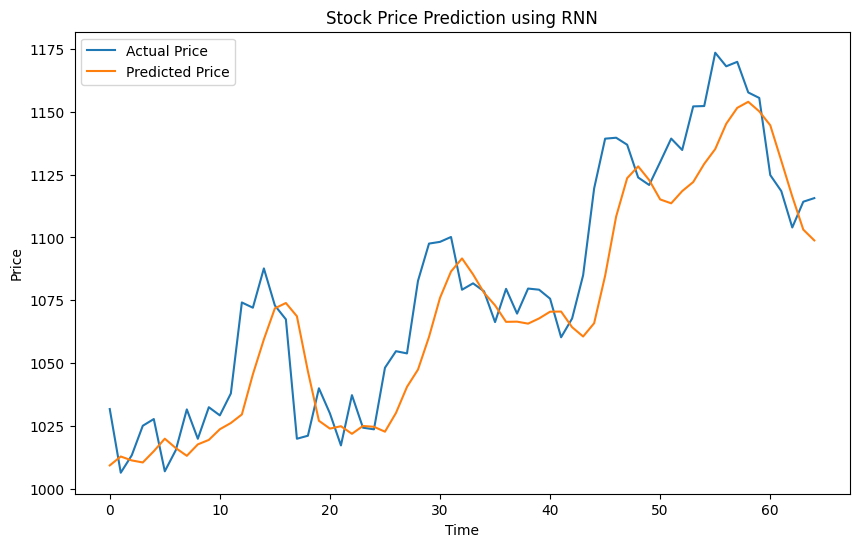

Name: HAREVASU S
Register Number: 212223230069
Predicted Price: [1098.8339]
Actual Price: [1115.65]


In [ ]:
model.eval()
with torch.no_grad():
  predicted = model(x_test_tensor.to(device)).cpu().numpy()
  actual=y_test_tensor.cpu().numpy()

predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(actual)
print("Name: HAREVASU S")
print("Register Number: 212223230069")
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction using RNN')
plt.legend()
plt.show()

print("Name: HAREVASU S")
print("Register Number: 212223230069")
print(f'Predicted Price: {predicted_prices[-1]}')
print(f'Actual Price: {actual_prices[-1]}')